## Problem Statement

Based on the qualites and knowledge of a person using classification algorithms to predict weather the salary of a person is going to be exceed 50,000 or not.

# About Dataset
Extraction was done by Barry Becker from the 1994 Census database.
Prediction task is to determine whether a person makes over 50K a year.

## Columns are:
age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.
hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

salary: <=50K or >50K

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import RobustScaler


# Data Preprocessing

In [ ]:
# Reading data 
df = pd.read_csv("salary.csv", na_values=[' ?' ])

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.shape

(32561, 15)

Dataset contains 15 features including target variable with 32,561 rows.

In [ ]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

Target coulmn salary has two values making this project binary classification with ' <=50K', ' >50K' values

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [ ]:
# check data type of each coulmn
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Dataset contains both categorical and numerical columns

In [ ]:
# Number of uniques values in dataframe

pd.DataFrame({'': df.nunique().index , 'Count_of_unique_values':  df.nunique().values})

,,Count_of_unique_values
0,age,73
1,workclass,8
2,fnlwgt,21648
3,education,16
4,education-num,16
5,marital-status,7
6,occupation,14
7,relationship,6
8,race,5
9,sex,2


In [ ]:
#show unique values for all columns
for col in df.columns.values:
  print(col, end="\n\n")
  print(df[col].unique(), end="\n\n")

age

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

workclass

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 nan ' Self-emp-inc' ' Without-pay' ' Never-worked']

fnlwgt

[ 77516  83311 215646 ...  34066  84661 257302]

education

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

education-num

[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

marital-status

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

occupation

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing'

In [ ]:
#Removing spaces from objects data types
df.loc[: , df.dtypes == np.object].apply(lambda e : e.unique())

<ipython-input-10-b508c25ab591>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.loc[: , df.dtypes == np.object].apply(lambda e : e.unique())


workclass         [ State-gov,  Self-emp-not-inc,  Private,  Fed...
education         [ Bachelors,  HS-grad,  11th,  Masters,  9th, ...
marital-status    [ Never-married,  Married-civ-spouse,  Divorce...
occupation        [ Adm-clerical,  Exec-managerial,  Handlers-cl...
relationship      [ Not-in-family,  Husband,  Wife,  Own-child, ...
race              [ White,  Black,  Asian-Pac-Islander,  Amer-In...
sex                                                [ Male,  Female]
native-country    [ United-States,  Cuba,  Jamaica,  India, nan,...
salary                                              [ <=50K,  >50K]
dtype: object

In [ ]:
for col in df.loc[: , df.dtypes == np.object].columns:
    df[col] = df[col].str.strip()

<ipython-input-11-731be8b50486>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  for col in df.loc[: , df.dtypes == np.object].columns:


In [ ]:
#some statistical information about data 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [ ]:
## describing categorical data
df.describe(include = 'object').T

,count,unique,top,freq
workclass,30725,8,Private,22696
education,32561,16,HS-grad,10501
marital-status,32561,7,Married-civ-spouse,14976
occupation,30718,14,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native-country,31978,41,United-States,29170
salary,32561,2,<=50K,24720


In [ ]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64


### There are multiple missing values in the categorical columns of the dataset. As the numbers are big in size we'll fill the missing values with most frequent values using mode

In [ ]:
# Filling missing values with MODE

df['workclass'].fillna(df['workclass'].mode()[0] , axis=0 ,inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0] , axis=0 ,inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0] , axis=0 ,inplace=True)

In [ ]:
#check null values again
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

**Missing values have been treated**

## Checking for duplicates and removing them

In [ ]:
#check Duplicates
df.duplicated().sum()

24

In [ ]:
#remove duplicate but leave one 
df.drop_duplicates(keep='first',inplace=True)
df.shape

(32537, 15)

In [ ]:
#comparing education with education num
print(df["education"].value_counts(), end="\n\n\n")
print(df["education-num"].value_counts())

HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64


9     10494
10     7282
13     5353
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: education-num, dtype: int64


We can observe both columns are displaying same information with different data types

In [ ]:
'''
1) Preschool
2) 1-4
3) 5-6
4) 7-8
5) 9
6) 10
7) 11
8) 12
9) HS-grad
10) some-college
11) Assoc-voc
12) Assoc-acdm
13) Bachelors
14) Master
15) Prof-school
16) Doctrate
'''

'\n1) Preschool\n2) 1-4\n3) 5-6\n4) 7-8\n5) 9\n6) 10\n7) 11\n8) 12\n9) HS-grad\n10) some-college\n11) Assoc-voc\n12) Assoc-acdm\n13) Bachelors\n14) Master\n15) Prof-school\n16) Doctrate\n'

# EDA

Text(0.5, 1.0, 'Salaries ratio for all persons')

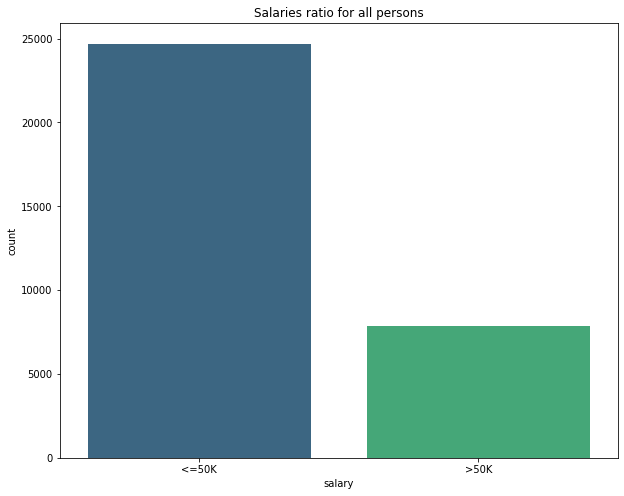

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.countplot( x=df.salary , data= df , palette='viridis')
ax.set_title('Salaries ratio for all persons')

**We can observe the ratio of person salary is to exceed 50000 to the salary below 50000 is approximately 3:1**

Text(0.5, 1.0, 'Salaries ratio by Gender')

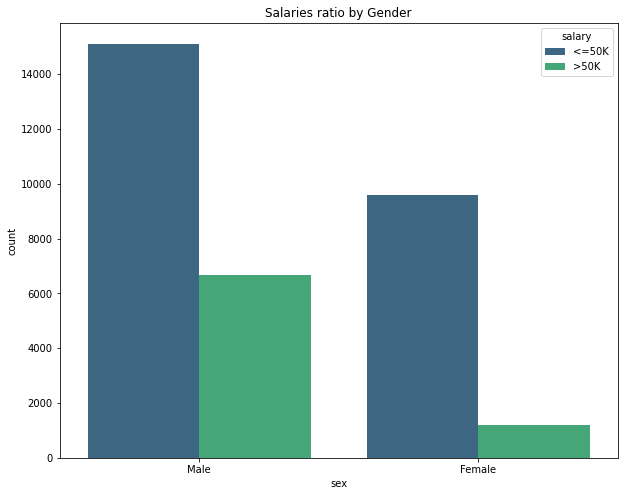

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='sex', hue='salary', palette='viridis').set_title('Salaries ratio by Gender')

**Female salary ratio is very low compared to male that says more number of female employees are getting paid more than 50000 when compared to same of gender who are getting paid less**

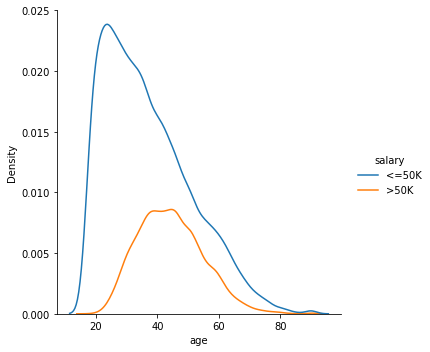

In [ ]:
sns.displot(data=df, x="age", hue="salary", kind="kde", height=5, aspect=1)

**People aged below 30 are mostly under 50000 slot**

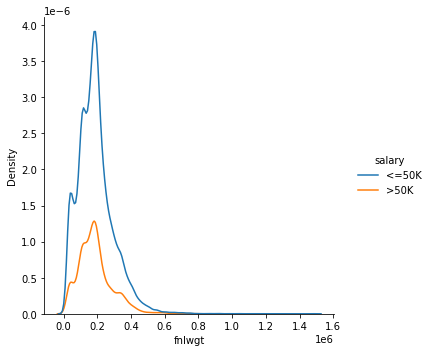

In [ ]:
sns.displot(data=df, x="fnlwgt", hue="salary", kind="kde", height=5, aspect=1)

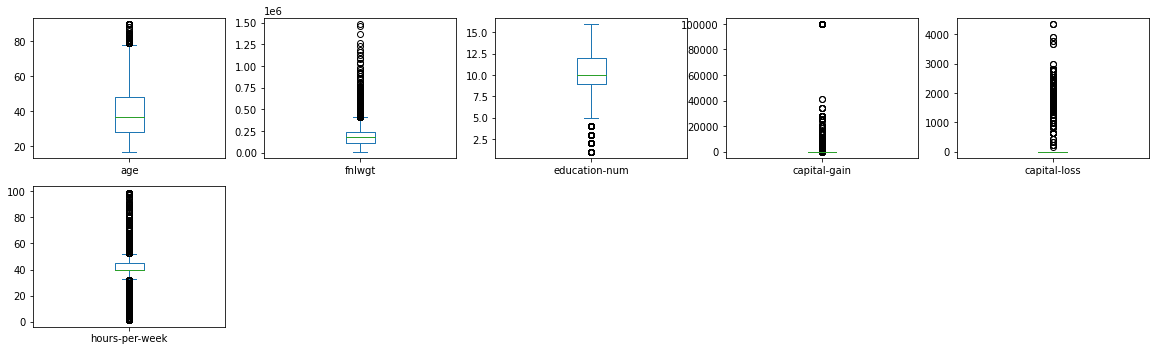

In [ ]:
#check outliers
df.plot(kind = "box" , subplots = True , figsize = (20,15) ,  layout = (5,5))
plt.show()

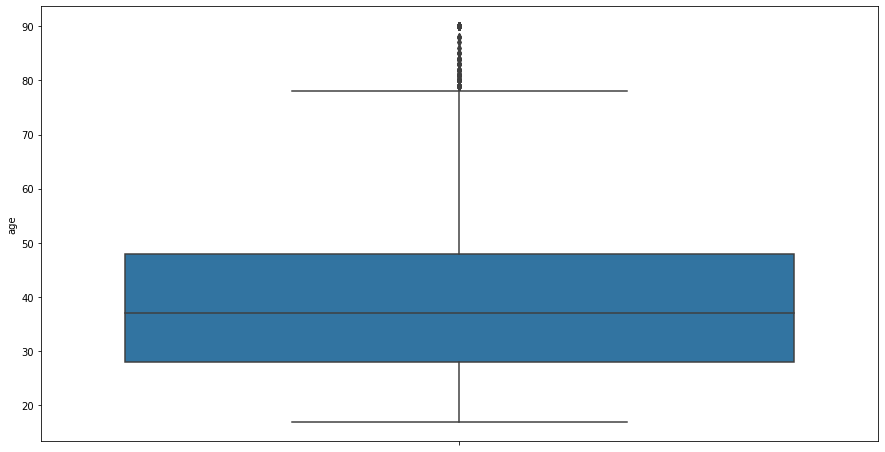

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, y="age")

In [ ]:
outAge = df[df['age'] > 61]
outAge.shape #get number of rows with outliers (Q3 + 1.5(Q3 - Q1))

(2031, 15)

**As there are 2031 outliers of age present in data it might have some effect on the datset so not treating them**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


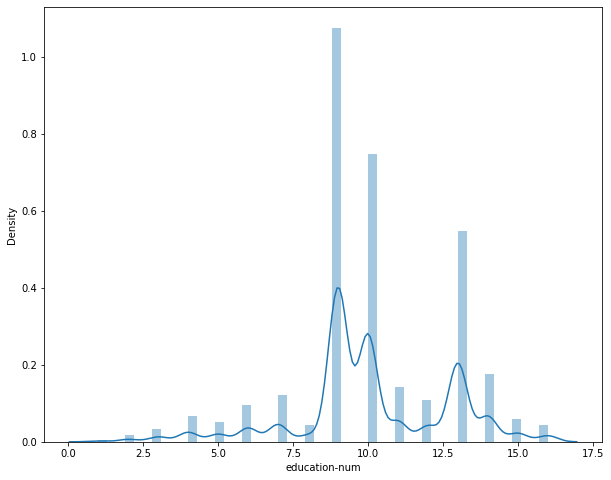

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(df['education-num'])
plt.show()

In [ ]:
outEdu = df[df['education-num'] < 3.5]
outEdu.shape #get number of rows with outliers (Q1 - 1.5(Q3 - Q1))

(548, 15)

In [ ]:
df.drop(outEdu.index, inplace = True)

In [ ]:
## As the education_num and education is displaying same information in different way let's remove education column
df.drop('education', axis = 1, inplace = True)

## Converting categorical to numerical

In [ ]:
le = LabelEncoder()

In [ ]:
for i in df.columns:
    if (df[i].dtypes== 'object') :
        df[i] = le.fit_transform(df[i])

In [ ]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [ ]:
smote=SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Modeling

# Random Forest Model

In [ ]:
clf = RandomForestClassifier()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2,random_state=44 )

In [ ]:
model = clf.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy on Test Data : {:,.2f}".format(clf.score(X_test , y_test) *100 ) , '%')

Accuracy on Test Data : 87.65 %


In [ ]:
print(accuracy_score(y_pred, y_test))

0.8765125659323612


In [ ]:
confusion_matrix(y_test ,y_pred)

array([[4158,  629],
       [ 565, 4317]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


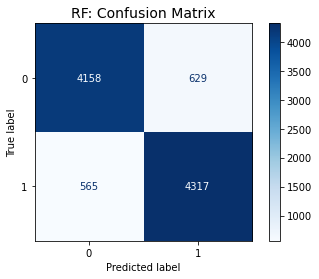

In [ ]:
plot_confusion_matrix(model, X_test, y_test,cmap='Blues')
plt.title('RF: Confusion Matrix', fontsize=14)
plt.show()

In [ ]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4787
           1       0.87      0.88      0.88      4882

    accuracy                           0.88      9669
   macro avg       0.88      0.88      0.88      9669
weighted avg       0.88      0.88      0.88      9669



## XGBoost model

In [ ]:
from xgboost import XGBClassifier 

In [ ]:
xgb = XGBClassifier()
xgbc = xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [ ]:
xgb_train_pred = xgb.predict(X_train)
xgb_train_accuracy = accuracy_score(y_train, xgb_train_pred)*100
xgb_train_accuracy

86.7666451195863

In [ ]:
xgb_test_accuracy = accuracy_score(y_test, xgb_pred)*100
xgb_test_accuracy

86.14127624366532

In [ ]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      4787
           1       0.84      0.90      0.87      4882

    accuracy                           0.86      9669
   macro avg       0.86      0.86      0.86      9669
weighted avg       0.86      0.86      0.86      9669



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


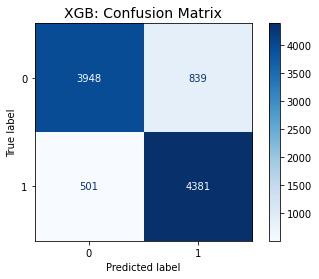

In [ ]:
plot_confusion_matrix(xgbc, X_test, y_test,cmap='Blues')
plt.title('XGB: Confusion Matrix', fontsize=14)
plt.show()

## KNN model 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
k_values = range(3, 21)
list(k_values)

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [ ]:
test_accuracy={}

In [ ]:
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  knn_pred = knn.predict(X_test)
  test_accuracy[k] = accuracy_score(y_test, knn_pred)

In [ ]:
test_accuracy

{3: 0.745371806805254,
 4: 0.7362705553831834,
 5: 0.7290309235701727,
 6: 0.7262384941565829,
 7: 0.718688592408729,
 8: 0.7173440893577412,
 9: 0.7105181507911883,
 10: 0.7114489605957183,
 11: 0.7021408625504189,
 12: 0.7048298686523943,
 13: 0.695314923983866,
 14: 0.6949012307374082,
 15: 0.6892129485986142,
 16: 0.6895232185334574,
 17: 0.6866273658082532,
 18: 0.6874547523011687,
 19: 0.6820767400972179,
 20: 0.6860068259385665}

## From the above analysis we can observe that random forest model is giving better model with 87.65% accuracy